In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import nltk
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
import string

In [2]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [3]:
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM, Bidirectional

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.layers import TextVectorization

## Bags of words embedding

In [7]:
dt = pd.read_csv('train.csv',encoding ='utf-8')

In [8]:
# english data set
df_en = dt.loc[dt['lang_abv'] == 'en']
df_en

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [9]:
#english x
x = df_en.premise.values +' '+ df_en.hypothesis.values
#english y 
y = df_en.label.values
# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
y_train

array([2, 0, 2, ..., 0, 1, 0], dtype=int64)

In [11]:
X_train_tok = [word_tokenize(sentence) for sentence in x_train]
X_train_tok = [[word.lower() for word in s]for s in X_train_tok]
X_train_tok = [[word for word in s if word.isalpha()]for s in X_train_tok]

In [12]:
text = []
for l in X_train_tok:
    for i in l:
        text.append(i)

In [13]:
text = set(text)
text1 =list(text)

In [14]:
# Model constants.
max_features = len(text1)+2
embedding_dim = 128
sequence_length = 100


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#vectorize_layer.adapt(x_train)

In [20]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'high',
 'slaughtering',
 'failings',
 'cry',
 'esb',
 'winning',
 'fooling',
 'near',
 'cockpit',
 'cesare',
 'bur',
 'hondo',
 'reviews',
 'aswan',
 'alsacien',
 'ebb',
 'tarpley',
 'conversation',
 'winter',
 'greuze',
 'sikhs',
 'letting',
 'wrongly',
 'salads',
 'appetite',
 'newshour',
 'sons',
 'learning',
 'resigned',
 'dislocation',
 'barton',
 'live',
 'equate',
 'prancing',
 'charges',
 'rapid',
 'bradley',
 'diego',
 'molokai',
 'welcomed',
 'chicken',
 'gracious',
 'ranging',
 'dejima',
 'scary',
 'records',
 'pondering',
 'someday',
 'thrill',
 'handed',
 'allow',
 'neighboring',
 'string',
 'electrical',
 'people',
 'analytical',
 'artistic',
 'john',
 'confront',
 'or',
 'admits',
 'instincts',
 'sailing',
 'providers',
 'dali',
 'nations',
 'bowed',
 'gazing',
 'roman',
 'blend',
 'mailers',
 'domination',
 'miss',
 'ocean',
 'unavailability',
 'tuileries',
 'complaints',
 'mailbox',
 'conditioning',
 'uphold',
 'equal',
 'video',
 'gallery',
 'bangers'

In [101]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)

In [22]:
X_train

<tf.Tensor: shape=(4809, 100), dtype=int64, numpy=
array([[ 7984,  3153,  6349, ...,     0,     0,     0],
       [ 8477,  6907, 10470, ...,     0,     0,     0],
       [    1,  7683,  6883, ...,     0,     0,     0],
       ...,
       [    1,  4948,  1913, ...,     0,     0,     0],
       [ 4948, 10470,  6349, ...,     0,     0,     0],
       [ 8400,  8305,   786, ...,     0,     0,     0]], dtype=int64)>

In [24]:
# Convert y to OHE 
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [24]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.1)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.1)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
cnn = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 5s 31ms/step - loss: 1.0998 - accuracy: 0.3436 - val_loss: 1.0990 - val_accuracy: 0.3482
Epoch 2/3
121/121 [==============================] - 3s 29ms/step - loss: 1.0908 - accuracy: 0.3665 - val_loss: 1.1223 - val_accuracy: 0.2983
Epoch 3/3
121/121 [==============================] - 3s 29ms/step - loss: 0.8675 - accuracy: 0.6270 - val_loss: 1.3879 - val_accuracy: 0.2775


In [26]:
cnn_pred = np.round(model.predict(X_test))

65/65 [==============================] - 0s 5ms/step


In [27]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.13925278990781173
F1-score [0.13320463 0.20287253 0.19230769]
Classification report:
              precision    recall  f1-score   support

           0       0.22      0.10      0.13       720
           1       0.24      0.18      0.20       637
           2       0.27      0.15      0.19       704

   micro avg       0.24      0.14      0.18      2061
   macro avg       0.24      0.14      0.18      2061
weighted avg       0.24      0.14      0.17      2061
 samples avg       0.14      0.14      0.14      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
input = Input(shape=(100,), dtype="int64") 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
cnn1 = model1.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 4s 27ms/step - loss: 1.1001 - accuracy: 0.3512 - val_loss: 1.0984 - val_accuracy: 0.3482
Epoch 2/3
121/121 [==============================] - 3s 26ms/step - loss: 1.0863 - accuracy: 0.3907 - val_loss: 1.0913 - val_accuracy: 0.3462
Epoch 3/3
121/121 [==============================] - 3s 26ms/step - loss: 1.0335 - accuracy: 0.4926 - val_loss: 1.1674 - val_accuracy: 0.3233


In [43]:
cnn_pred1 = np.round(model1.predict(X_test))

65/65 [==============================] - 0s 4ms/step


In [44]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred1))
print('F1-score %s' % f1_score(y_test, cnn_pred1,average=None,zero_division = 0))
print('Classification report:')
print(classification_report(y_test, cnn_pred1))

Accuracy 0.14313440077632217
F1-score [0.25892857 0.         0.25608466]
Classification report:
              precision    recall  f1-score   support

           0       0.28      0.24      0.26       720
           1       0.00      0.00      0.00       637
           2       0.50      0.17      0.26       704

   micro avg       0.34      0.14      0.20      2061
   macro avg       0.26      0.14      0.17      2061
weighted avg       0.27      0.14      0.18      2061
 samples avg       0.14      0.14      0.14      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [45]:
input = Input(shape=(sequence_length, )) 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [46]:
model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
lstm = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 11s 80ms/step - loss: 1.0989 - accuracy: 0.3447 - val_loss: 1.0983 - val_accuracy: 0.3482
Epoch 2/3
121/121 [==============================] - 9s 77ms/step - loss: 1.0783 - accuracy: 0.3967 - val_loss: 1.0708 - val_accuracy: 0.3960
Epoch 3/3
121/121 [==============================] - 9s 77ms/step - loss: 0.9836 - accuracy: 0.5186 - val_loss: 1.1507 - val_accuracy: 0.3368


In [48]:
lstm_pred = np.round(model.predict(X_test))

65/65 [==============================] - 2s 21ms/step


In [49]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.13148956817079088
F1-score [0.0809816  0.13768961 0.31793961]
Classification report:
              precision    recall  f1-score   support

           0       0.35      0.05      0.08       720
           1       0.27      0.09      0.14       637
           2       0.42      0.25      0.32       704

   micro avg       0.37      0.13      0.19      2061
   macro avg       0.35      0.13      0.18      2061
weighted avg       0.35      0.13      0.18      2061
 samples avg       0.13      0.13      0.13      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
inputs = Input(shape=(sequence_length,))
# Embed each integer in a 128-dimensional vector
x = Embedding(max_features, embedding_dim)(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
lstm = model.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 29s 194ms/step - loss: 1.0999 - accuracy: 0.3416 - val_loss: 1.0985 - val_accuracy: 0.3482
Epoch 2/10
121/121 [==============================] - 22s 184ms/step - loss: 1.0949 - accuracy: 0.3663 - val_loss: 1.1186 - val_accuracy: 0.2588
Epoch 3/10
121/121 [==============================] - 22s 184ms/step - loss: 1.0189 - accuracy: 0.4749 - val_loss: 1.2199 - val_accuracy: 0.2277
Epoch 4/10
121/121 [==============================] - 23s 188ms/step - loss: 0.8657 - accuracy: 0.5820 - val_loss: 1.5448 - val_accuracy: 0.2058
Epoch 5/10
121/121 [==============================] - 22s 185ms/step - loss: 0.7193 - accuracy: 0.6577 - val_loss: 2.0297 - val_accuracy: 0.2006
Epoch 6/10
121/121 [==============================] - 22s 183ms/step - loss: 0.5813 - accuracy: 0.7180 - val_loss: 2.3735 - val_accuracy: 0.1975
Epoch 7/10
121/121 [==============================] - 22s 178ms/step - loss: 0.4810 - accuracy: 0.7764 - val_loss: 2.6921 - val_ac

In [75]:
lstm_pred = np.round(model.predict(X_test))

65/65 [==============================] - 4s 49ms/step


In [76]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.22998544395924309
F1-score [0.22617354 0.21061644 0.25823806]
Classification report:
              precision    recall  f1-score   support

           0       0.23      0.22      0.23       720
           1       0.23      0.19      0.21       637
           2       0.25      0.27      0.26       704

   micro avg       0.24      0.23      0.23      2061
   macro avg       0.24      0.23      0.23      2061
weighted avg       0.24      0.23      0.23      2061
 samples avg       0.23      0.23      0.23      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pre-trained embeddings

In [38]:
!unzip -q glove.6B.zip

^C


In [103]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [104]:
word_index

{'': 0,
 '[UNK]': 1,
 'high': 2,
 'slaughtering': 3,
 'failings': 4,
 'cry': 5,
 'esb': 6,
 'winning': 7,
 'fooling': 8,
 'near': 9,
 'cockpit': 10,
 'cesare': 11,
 'bur': 12,
 'hondo': 13,
 'reviews': 14,
 'aswan': 15,
 'alsacien': 16,
 'ebb': 17,
 'tarpley': 18,
 'conversation': 19,
 'winter': 20,
 'greuze': 21,
 'sikhs': 22,
 'letting': 23,
 'wrongly': 24,
 'salads': 25,
 'appetite': 26,
 'newshour': 27,
 'sons': 28,
 'learning': 29,
 'resigned': 30,
 'dislocation': 31,
 'barton': 32,
 'live': 33,
 'equate': 34,
 'prancing': 35,
 'charges': 36,
 'rapid': 37,
 'bradley': 38,
 'diego': 39,
 'molokai': 40,
 'welcomed': 41,
 'chicken': 42,
 'gracious': 43,
 'ranging': 44,
 'dejima': 45,
 'scary': 46,
 'records': 47,
 'pondering': 48,
 'someday': 49,
 'thrill': 50,
 'handed': 51,
 'allow': 52,
 'neighboring': 53,
 'string': 54,
 'electrical': 55,
 'people': 56,
 'analytical': 57,
 'artistic': 58,
 'john': 59,
 'confront': 60,
 'or': 61,
 'admits': 62,
 'instincts': 63,
 'sailing': 64,
 '

In [105]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400001 word vectors.


In [106]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0
words_not_found = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        words_not_found.append(word)
print("Converted %d words (%d misses)" % (hits, misses))

Converted 10507 words (257 misses)


In [107]:
words_not_found

['',
 '[UNK]',
 'alsacien',
 'salesladies',
 'microhockey',
 'smelledof',
 'nasire',
 'eupalinos',
 'czarek',
 'compressable',
 'bedesten',
 'bhansi',
 'tadminster',
 'newhoff',
 'perestrelo',
 'chrysolite',
 'barenakedino',
 'meydane',
 'nkow',
 'bhuleshwar',
 'unpompous',
 'ofrequired',
 'photomurals',
 'iversons',
 'furniure',
 'whitebelly',
 'workshare',
 'interlaboratory',
 'heand',
 'egus',
 'vedr',
 'atechnical',
 'casuality',
 'dubbawya',
 'uluda',
 'recultivate',
 'marlenheim',
 'tragea',
 'smegal',
 'sabelhaus',
 'ataterk',
 'beryllina',
 'wealthies',
 'carbet',
 'louisian',
 'ofiice',
 'idpa',
 'showbizzy',
 'riviyre',
 'espetada',
 'counterevidence',
 'mastihohoria',
 'troues',
 'siddartha',
 'mailstreams',
 'redhanded',
 'atat',
 'afterthefact',
 'knowledgebased',
 'cityart',
 'gauve',
 'pattys',
 'pollentia',
 'montmarte',
 'panzar',
 'citypalace',
 'preservationalists',
 'disintermediating',
 'mutahir',
 'nontransportation',
 'monumentalprotection',
 'tetanic',
 'huaishe

In [108]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    #trainable=False,
)

### cnn

In [110]:
int_sequences_input = keras.Input(shape=(100,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 3, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D()(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.MaxPooling1D()(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=int_sequences_input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
cnn = model1.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 4s 28ms/step - loss: 1.1108 - accuracy: 0.3509 - val_loss: 1.1025 - val_accuracy: 0.3451
Epoch 2/5
121/121 [==============================] - 3s 27ms/step - loss: 1.0854 - accuracy: 0.3941 - val_loss: 1.1009 - val_accuracy: 0.3524
Epoch 3/5
121/121 [==============================] - 3s 27ms/step - loss: 1.0367 - accuracy: 0.4778 - val_loss: 1.1091 - val_accuracy: 0.3617
Epoch 4/5
121/121 [==============================] - 3s 27ms/step - loss: 0.9206 - accuracy: 0.5643 - val_loss: 1.1317 - val_accuracy: 0.3597
Epoch 5/5
121/121 [==============================] - 3s 27ms/step - loss: 0.6714 - accuracy: 0.7252 - val_loss: 1.3466 - val_accuracy: 0.3576


In [112]:
cnn_pred = np.round(model1.predict(X_test))

65/65 [==============================] - 0s 6ms/step


In [113]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.24939349830179525
F1-score [0.34972678 0.30877193 0.18201998]
Classification report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35       720
           1       0.35      0.28      0.31       637
           2       0.42      0.12      0.18       704

   micro avg       0.36      0.25      0.29      2061
   macro avg       0.37      0.25      0.28      2061
weighted avg       0.37      0.25      0.28      2061
 samples avg       0.25      0.25      0.25      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
input = Input(shape=(100,), dtype="int64") 
x   =  embedding_layer(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model = Model(inputs=input, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
cnn = model.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 4s 26ms/step - loss: 1.1140 - accuracy: 0.3405 - val_loss: 1.1051 - val_accuracy: 0.3233
Epoch 2/5
121/121 [==============================] - 3s 24ms/step - loss: 1.0908 - accuracy: 0.3826 - val_loss: 1.1096 - val_accuracy: 0.3347
Epoch 3/5
121/121 [==============================] - 3s 24ms/step - loss: 1.0524 - accuracy: 0.4554 - val_loss: 1.1207 - val_accuracy: 0.3368
Epoch 4/5
121/121 [==============================] - 3s 24ms/step - loss: 0.9610 - accuracy: 0.5487 - val_loss: 1.2645 - val_accuracy: 0.3170
Epoch 5/5
121/121 [==============================] - 3s 24ms/step - loss: 0.8206 - accuracy: 0.6428 - val_loss: 1.3183 - val_accuracy: 0.3170


In [120]:
cnn_pred = np.round(model.predict(X_test))

65/65 [==============================] - 1s 7ms/step


In [121]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.21542940320232898
F1-score [0.10383747 0.34543011 0.26679281]
Classification report:
              precision    recall  f1-score   support

           0       0.28      0.06      0.10       720
           1       0.30      0.40      0.35       637
           2       0.40      0.20      0.27       704

   micro avg       0.32      0.22      0.26      2061
   macro avg       0.33      0.22      0.24      2061
weighted avg       0.33      0.22      0.23      2061
 samples avg       0.22      0.22      0.22      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### lstm

In [122]:
int_sequences_input = keras.Input(shape=(100,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(embedded_sequences)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)
lstm_model = Model(inputs=int_sequences_input, outputs=x)
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm = lstm_model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 41s 326ms/step - loss: 1.1010 - accuracy: 0.3486 - val_loss: 1.0987 - val_accuracy: 0.3503
Epoch 2/3
121/121 [==============================] - 39s 325ms/step - loss: 1.0596 - accuracy: 0.4318 - val_loss: 1.0969 - val_accuracy: 0.3701
Epoch 3/3
121/121 [==============================] - 39s 326ms/step - loss: 0.9394 - accuracy: 0.5516 - val_loss: 1.2334 - val_accuracy: 0.3690


In [123]:
lstm_pred = np.round(lstm_model.predict(X_test))

65/65 [==============================] - 4s 54ms/step


In [124]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.22125181950509462
F1-score [0.08302808 0.24072217 0.40536913]
Classification report:
              precision    recall  f1-score   support

           0       0.34      0.05      0.08       720
           1       0.33      0.19      0.24       637
           2       0.38      0.43      0.41       704

   micro avg       0.37      0.22      0.28      2061
   macro avg       0.35      0.22      0.24      2061
weighted avg       0.35      0.22      0.24      2061
 samples avg       0.22      0.22      0.22      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
inputs = Input(shape=(sequence_length,))
# Embed each integer in a 128-dimensional vector
x = embedding_layer(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs=x)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [133]:
lstm = model2.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 81s 636ms/step - loss: 1.0233 - accuracy: 0.4549 - val_loss: 1.3113 - val_accuracy: 0.3119
Epoch 2/5
121/121 [==============================] - 70s 578ms/step - loss: 0.8714 - accuracy: 0.6207 - val_loss: 1.5195 - val_accuracy: 0.3077
Epoch 3/5
121/121 [==============================] - 71s 587ms/step - loss: 0.7462 - accuracy: 0.6946 - val_loss: 1.4782 - val_accuracy: 0.2848
Epoch 4/5
121/121 [==============================] - 75s 620ms/step - loss: 0.6484 - accuracy: 0.7377 - val_loss: 1.7203 - val_accuracy: 0.3191
Epoch 5/5
121/121 [==============================] - 79s 653ms/step - loss: 0.5237 - accuracy: 0.7944 - val_loss: 1.9165 - val_accuracy: 0.3202


In [134]:
pred = np.round(model2.predict(X_test))

65/65 [==============================] - 12s 161ms/step


In [135]:
print('Accuracy %s' % accuracy_score(y_test, pred))
print('F1-score %s' % f1_score(y_test, pred, average=None))
print('Classification report:')
print(classification_report(y_test,pred))

Accuracy 0.2828723920426977
F1-score [0.18967136 0.31390135 0.36657682]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.14      0.19       720
           1       0.30      0.33      0.31       637
           2       0.35      0.39      0.37       704

   micro avg       0.32      0.28      0.30      2061
   macro avg       0.31      0.29      0.29      2061
weighted avg       0.31      0.28      0.29      2061
 samples avg       0.28      0.28      0.28      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


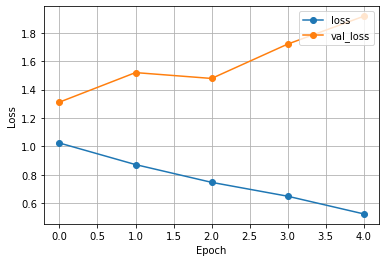

In [136]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

## FastText

In [15]:
# now sequence must be 300 to fit with fastText
max_features = len(text1)+2
embedding_dim = 128
sequence_length = 300


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#commented because we passed a vocabulary
#vectorize_layer.adapt(x_train)

In [16]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)

In [137]:
!unzip -q crawl-300d-2M.vec.zip

In [17]:
embeddings_index = {}
with open('crawl-300d-2M.vec', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 1999996 word vectors.


In [18]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [19]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0
words_not_found = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        words_not_found.append(word)
print("Converted %d words (%d misses)" % (hits, misses))

Converted 10421 words (343 misses)


In [20]:
words_not_found

['',
 '[UNK]',
 'proserous',
 'crosethe',
 'tarpley',
 'tzfat',
 'hoysala',
 'allenby',
 'filipa',
 'photomurals',
 'yanomamo',
 'cityalk',
 'hurriya',
 'uluda',
 'beaubourg',
 'capgains',
 'labord',
 'lvov',
 'blencathra',
 'patlecan',
 'mayar',
 'francesc',
 'pedder',
 'unibasket',
 'kizartmas',
 'kinsky',
 'osmin',
 'scafeld',
 'mutahir',
 'eupalinos',
 'podunkowice',
 'ofrequired',
 'berbera',
 'iolani',
 'savonarola',
 'tadminster',
 'vreanna',
 'cabourg',
 'microhockey',
 'kentridge',
 'vezir',
 'nahariya',
 'dinard',
 'borsig',
 'palmaria',
 'erlenborn',
 'gauve',
 'kutchins',
 'galim',
 'royko',
 'mrinal',
 'marathas',
 'riph',
 'greuze',
 'panzar',
 'tramuntana',
 'langmuir',
 'workshared',
 'hersheimmer',
 'gododdin',
 'lolani',
 'ataterk',
 'clienteligible',
 'mauryas',
 'fwi',
 'ptolemies',
 'louisian',
 'voth',
 'tuileries',
 'barogue',
 'srivijaya',
 'stephanopoulos',
 'nabatean',
 'disaffecting',
 'kadifekale',
 'czarek',
 'javis',
 'melroseabbey',
 'adversisers',
 'stra

In [21]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [26]:
input = keras.Input(shape=(300,), dtype="int64")
embedded_sequences = embedding_layer(input)
x = Conv1D(128, 3, activation="relu")(embedded_sequences)
x = GlobalMaxPooling1D()(x)
#x = Conv1D(128, 3, activation="relu")(x)
#x = GlobalMaxPooling1D()(x)
#x = Conv1D(128, 3, activation="relu")(x)
#x = GlobalMaxPooling1D()(x)
x = Dense(3, activation="softmax")(x)

m = Model(inputs=input, outputs=x)
m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c = m.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 5s 37ms/step - loss: 1.1382 - accuracy: 0.3151 - val_loss: 1.1421 - val_accuracy: 0.2952
Epoch 2/5
121/121 [==============================] - 4s 36ms/step - loss: 0.9574 - accuracy: 0.5812 - val_loss: 1.1640 - val_accuracy: 0.3004
Epoch 3/5
121/121 [==============================] - 4s 37ms/step - loss: 0.8440 - accuracy: 0.6860 - val_loss: 1.2003 - val_accuracy: 0.2963
Epoch 4/5
121/121 [==============================] - 4s 37ms/step - loss: 0.7296 - accuracy: 0.7551 - val_loss: 1.2616 - val_accuracy: 0.3015
Epoch 5/5
121/121 [==============================] - 4s 36ms/step - loss: 0.6238 - accuracy: 0.8089 - val_loss: 1.3377 - val_accuracy: 0.2827


In [27]:
pr = np.round(m.predict(X_test))

65/65 [==============================] - 1s 11ms/step


In [28]:
print('Accuracy %s' % accuracy_score(y_test, pr))
print('F1-score %s' % f1_score(y_test, pr, average=None, zero_division = 1))
print('Classification report:')
print(classification_report(y_test,pr,zero_division = 1))

Accuracy 0.17515769044153323
F1-score [0.28991597 0.11777778 0.20507614]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       720
           1       0.20      0.08      0.12       637
           2       0.36      0.14      0.21       704

   micro avg       0.29      0.18      0.22      2061
   macro avg       0.28      0.17      0.20      2061
weighted avg       0.29      0.18      0.21      2061
 samples avg       0.57      0.18      0.18      2061



In [29]:
input = Input(shape=(embedding_dim,), dtype="int64") 
x   =  embedding_layer(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

m1 = Model(inputs=input, outputs=x)
m1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
c1 = m1.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
121/121 [==============================] - 4s 33ms/step - loss: 1.1068 - accuracy: 0.3377 - val_loss: 1.1004 - val_accuracy: 0.3347
Epoch 2/5
121/121 [==============================] - 4s 33ms/step - loss: 1.0947 - accuracy: 0.3634 - val_loss: 1.1016 - val_accuracy: 0.3202
Epoch 3/5
121/121 [==============================] - 4s 32ms/step - loss: 1.0873 - accuracy: 0.3813 - val_loss: 1.1100 - val_accuracy: 0.3191
Epoch 4/5
121/121 [==============================] - 4s 33ms/step - loss: 1.0515 - accuracy: 0.4474 - val_loss: 1.1284 - val_accuracy: 0.3222
Epoch 5/5
121/121 [==============================] - 4s 33ms/step - loss: 0.9673 - accuracy: 0.5300 - val_loss: 1.2174 - val_accuracy: 0.3337


In [173]:
pr1 = np.round(m1.predict(X_test))

65/65 [==============================] - 2s 24ms/step


In [174]:
print('Accuracy %s' % accuracy_score(y_test, pr1))
print('F1-score %s' % f1_score(y_test, pr1, average=None, zero_division = 1))
print('Classification report:')
print(classification_report(y_test,pr1,zero_division = 1))

Accuracy 0.17467248908296942
F1-score [0.10280374 0.25716768 0.28620102]
Classification report:
              precision    recall  f1-score   support

           0       0.32      0.06      0.10       720
           1       0.29      0.23      0.26       637
           2       0.36      0.24      0.29       704

   micro avg       0.32      0.17      0.23      2061
   macro avg       0.32      0.18      0.22      2061
weighted avg       0.32      0.17      0.21      2061
 samples avg       0.63      0.17      0.17      2061



### lstm

In [175]:
int_sequences_input = keras.Input(shape=(embedding_dim,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x   =  LSTM(100, return_sequences=True,name='lstm_layer')(embedded_sequences)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)
lstm_model = Model(inputs=int_sequences_input, outputs=x)
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm = lstm_model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
121/121 [==============================] - 56s 449ms/step - loss: 1.1025 - accuracy: 0.3374 - val_loss: 1.1009 - val_accuracy: 0.3472
Epoch 2/3
121/121 [==============================] - 56s 462ms/step - loss: 1.0856 - accuracy: 0.3793 - val_loss: 1.1120 - val_accuracy: 0.3524
Epoch 3/3
121/121 [==============================] - 56s 467ms/step - loss: 1.0568 - accuracy: 0.4461 - val_loss: 1.0840 - val_accuracy: 0.3773


In [176]:
lstm_pred = np.round(lstm_model.predict(X_test))

65/65 [==============================] - 8s 116ms/step


In [177]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.07035419699175158
F1-score [0.01369863 0.         0.28865979]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       720
           1       0.00      0.00      0.00       637
           2       0.53      0.20      0.29       704

   micro avg       0.52      0.07      0.12      2061
   macro avg       0.34      0.07      0.10      2061
weighted avg       0.35      0.07      0.10      2061
 samples avg       0.07      0.07      0.07      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
inputs = Input(shape=(embedding_dim,))
# Embed each integer in a 128-dimensional vector
x = embedding_layer(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs=x)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm2 = model2.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 111s 869ms/step - loss: 1.1001 - accuracy: 0.3455 - val_loss: 1.1019 - val_accuracy: 0.3482
Epoch 2/10
121/121 [==============================] - 117s 972ms/step - loss: 1.0976 - accuracy: 0.3546 - val_loss: 1.0997 - val_accuracy: 0.3337
Epoch 3/10
121/121 [==============================] - 272s 2s/step - loss: 1.0931 - accuracy: 0.3780 - val_loss: 1.1073 - val_accuracy: 0.3139
Epoch 4/10
121/121 [==============================] - 122s 1s/step - loss: 1.0845 - accuracy: 0.3871 - val_loss: 1.1091 - val_accuracy: 0.3264
Epoch 5/10
121/121 [==============================] - 188s 2s/step - loss: 1.0687 - accuracy: 0.4195 - val_loss: 1.1801 - val_accuracy: 0.3056
Epoch 6/10
121/121 [==============================] - 275s 2s/step - loss: 1.0495 - accuracy: 0.4406 - val_loss: 1.1765 - val_accuracy: 0.2963
Epoch 7/10
121/121 [==============================] - 120s 989ms/step - loss: 1.0174 - accuracy: 0.4710 - val_loss: 1.1905 - val_accurac

In [23]:
pred = np.round(model2.predict(X_test))

65/65 [==============================] - 16s 214ms/step


In [24]:
print('Accuracy %s' % accuracy_score(y_test, pred))
print('F1-score %s' % f1_score(y_test, pred, average=None))
print('Classification report:')
print(classification_report(y_test,pred))

Accuracy 0.17515769044153323
F1-score [0.18423552 0.23518519 0.25160698]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.13      0.18       720
           1       0.29      0.20      0.24       637
           2       0.36      0.19      0.25       704

   micro avg       0.31      0.18      0.22      2061
   macro avg       0.31      0.18      0.22      2061
weighted avg       0.31      0.18      0.22      2061
 samples avg       0.18      0.18      0.18      2061



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


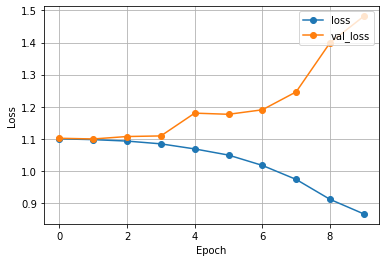

In [26]:
plt.plot(lstm2.history['loss'], label='loss', marker = 'o')
plt.plot(lstm2.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')